In [4]:
#谷歌云盘加载

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#0 加载库和数据集

In [5]:
#所有的库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_train=pd.read_csv(r"/content/drive/MyDrive/机器学习/Titanic_survive_predict/train.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test=pd.read_csv(r"/content/drive/MyDrive/机器学习/Titanic_survive_predict/test.csv")
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#1.数据的探索

##1.1数据的描述性统计

In [8]:
df_train.describe()   #默认统计数值的

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train.describe(include=["O"])  #大写字母O，会计算离散型变量（字符串）的描述性统计，参数include="all"会统计所有的类型的，还是分开统计较好

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bishop, Mr. Dickinson H",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_test.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Asplund, Mr. Johan Charles",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


##1.2空值与重复值探索

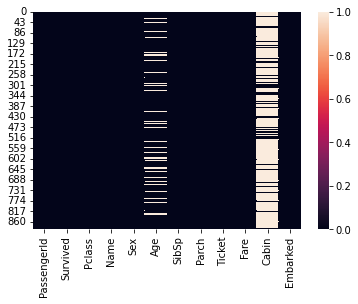

In [12]:
sns.heatmap(df_train.isnull())    #age有空值，cabin有大量空值

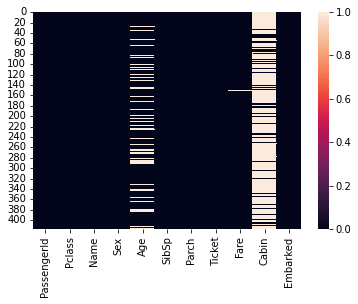

In [13]:
sns.heatmap(df_test.isnull())     #age有空值，cabin有大量空值，fare有空值

In [14]:
df_train["PassengerId"].unique().shape  #主键无重复

(891,)

In [15]:
df_test["PassengerId"].unique().shape

(418,)

#2.预处理与相关性统计

In [37]:
df_train_data=df_train.drop("Survived",axis=1)
df_train_data.Sex[df_train_data.Sex=="male"]=0
df_train_data.Sex[df_train_data.Sex=="female"]=1
df_train_data.Age.fillna(df_train_data.Age.mean(),inplace=True)
df_train_data.Fare.fillna(df_train_data.Fare.mean(),inplace=True)
df_train_data.Age.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [38]:
# sex已经处理，Name、Ticket、Cabin、Embarked全部丢弃

In [39]:
df_train_data.drop(["Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)  #就地转换
df_train_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,3,1,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,3,1,29.699118,1,2,23.4500
889,890,1,0,26.000000,0,0,30.0000


In [40]:
df_train_label=df_train["Survived"]
df_train_label.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
df_corr1=pd.concat([df_train_data,df_train_label],axis=1)
df_corr1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,1
3,4,1,1,35.000000,1,0,53.1000,1
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,1
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [42]:
corr_of_this=df_corr1.corr()
corr_of_this       #为什么性别的信息被漏了

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


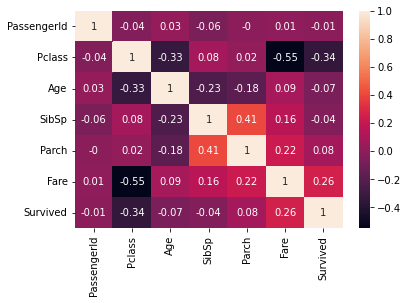

In [43]:
sns.heatmap(corr_of_this.round(2),annot=True)  #与pclass和fare相关度较高，但是还是没有特别相关，说明被舍弃的数据中含有重要信息，还需要挖掘

In [44]:
#1.空值填充？感觉也不是特别需要填充

#3.建模

In [45]:
#感觉RF模型会比较适合这个问题，试试
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
#1.训练集拆分
x_train,x_test,y_train,y_test=train_test_split(df_train_data,df_train_label,test_size=0.3)  #参数，data、label、test_size
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
799,800,3,1,30.000000,1,1,24.1500
826,827,3,0,29.699118,0,0,56.4958
9,10,2,1,14.000000,1,0,30.0708
790,791,3,0,29.699118,0,0,7.7500
608,609,2,1,22.000000,1,2,41.5792
...,...,...,...,...,...,...,...
234,235,2,0,24.000000,0,0,10.5000
482,483,3,0,50.000000,0,0,8.0500
202,203,3,0,34.000000,0,0,6.4958
70,71,2,0,32.000000,0,0,10.5000


In [48]:
#模型训练三部曲
rfcls=RandomForestClassifier(min_samples_leaf=5)
rfcls.fit(x_train,y_train)
rfcls.score(x_test,y_test)

0.8470149253731343